In [ ]:
import re
import pandas as pd

In [ ]:
f=open("/content/WhatsApp Chat with Differential Equation dydx.txt" ,'r',encoding='utf-8')

In [ ]:
data=f.read()

In [ ]:
print(data)

15/02/2023, 20:01 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
15/02/2023, 20:01 - You created this group
15/02/2023, 20:02 - Abid: Wellcome guys🫱🏻
15/02/2023, 20:03 - Umair Air: 🤔🤔
15/02/2023, 20:03 - Umair Air: Mei yaha kasa aya
15/02/2023, 20:04 - Abid: <Media omitted>
15/02/2023, 20:05 - Umair Air: Acha has hasna tha😐
15/02/2023, 20:05 - Abid: As you wish 😉
15/02/2023, 20:05 - Umair Air: Oky 👍
15/02/2023, 20:06 - Umair Air: Ghalti kr di hai mujhe add kr ke 😂😂
15/02/2023, 20:07 - Abid: This message was deleted
15/02/2023, 20:27 - Abid: Guys kal classes ky bad kam start karna hai assignments ka.
15/02/2023, 20:27 - Abid: Are you guys ready?
15/02/2023, 20:28 - Kiran: Labaik
15/02/2023, 20:30 - Umair Air: Nhi mei free ni hoo
15/02/2023, 20:31 - Abid: Q kahi jarahy ho😂?
15/02/2023, 20:32 - Umair Air: Ha g
15/02/2023, 20:33 - Abid: T?
15/02/2023, 20:33 - Umair Air: Smjha kro kch personal b h

In [ ]:
 pattern= '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [ ]:
messages = re.split(pattern, data)[1:]
len(messages)

3302

In [ ]:
 dates = re.findall(pattern, data)
 dates

['15/02/2023, 20:01 - ',
 '15/02/2023, 20:01 - ',
 '15/02/2023, 20:02 - ',
 '15/02/2023, 20:03 - ',
 '15/02/2023, 20:03 - ',
 '15/02/2023, 20:04 - ',
 '15/02/2023, 20:05 - ',
 '15/02/2023, 20:05 - ',
 '15/02/2023, 20:05 - ',
 '15/02/2023, 20:06 - ',
 '15/02/2023, 20:07 - ',
 '15/02/2023, 20:27 - ',
 '15/02/2023, 20:27 - ',
 '15/02/2023, 20:28 - ',
 '15/02/2023, 20:30 - ',
 '15/02/2023, 20:31 - ',
 '15/02/2023, 20:32 - ',
 '15/02/2023, 20:33 - ',
 '15/02/2023, 20:33 - ',
 '15/02/2023, 20:35 - ',
 '15/02/2023, 20:35 - ',
 '15/02/2023, 20:36 - ',
 '15/02/2023, 20:37 - ',
 '15/02/2023, 20:37 - ',
 '15/02/2023, 20:37 - ',
 '15/02/2023, 20:37 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:38 - ',
 '15/02/2023, 20:39 - ',
 '15/02/2023, 20:39 - ',
 '15/02/2023, 20:39 - ',
 '15/02/2023, 20:39 - ',
 '15/02/2023, 20:40 - ',
 '15/02/2023, 20:40 - ',


In [ ]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

# Rename the 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the first few rows of the DataFrame
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-02-15 20:01:00
1,You created this group\n,2023-02-15 20:01:00
2,Abid: Wellcome guys🫱🏻\n,2023-02-15 20:02:00
3,Umair Air: 🤔🤔\n,2023-02-15 20:03:00
4,Umair Air: Mei yaha kasa aya\n,2023-02-15 20:03:00


In [ ]:
 users = []
 messages = []
 for message in df['user_message']:
     entry = re.split('([\w\W]+?):\s', message)
     if entry[1:]:  # user name
         users.append(entry[1])
         messages.append(" ".join(entry[2:]))
     else:
         users.append('group_notification')
         messages.append(entry[0])

 df['user'] = users
 df['message'] = messages
 df.drop(columns=['user_message'], inplace=True)
 df.head()

,date,user,message
0,2023-02-15 20:01:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-02-15 20:01:00,group_notification,You created this group\n
2,2023-02-15 20:02:00,Abid,Wellcome guys🫱🏻\n
3,2023-02-15 20:03:00,Umair Air,🤔🤔\n
4,2023-02-15 20:03:00,Umair Air,Mei yaha kasa aya\n


In [ ]:
df['only_date'] = df['date'].dt.date
df['year'] = df['date'].dt.year
df['month_num'] = df['date'].dt.month
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
0,2023-02-15 20:01:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023-02-15,2023,2,February,15,Wednesday,20,1
1,2023-02-15 20:01:00,group_notification,You created this group\n,2023-02-15,2023,2,February,15,Wednesday,20,1
2,2023-02-15 20:02:00,Abid,Wellcome guys🫱🏻\n,2023-02-15,2023,2,February,15,Wednesday,20,2
3,2023-02-15 20:03:00,Umair Air,🤔🤔\n,2023-02-15,2023,2,February,15,Wednesday,20,3
4,2023-02-15 20:03:00,Umair Air,Mei yaha kasa aya\n,2023-02-15,2023,2,February,15,Wednesday,20,3


In [ ]:
# Remove rows where the 'user' column is equal to 'group_notification'
df = df[df['user'] != 'group_notification']
df.head()



,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute
2,2023-02-15 20:02:00,Abid,Wellcome guys🫱🏻\n,2023-02-15,2023,2,February,15,Wednesday,20,2
3,2023-02-15 20:03:00,Umair Air,🤔🤔\n,2023-02-15,2023,2,February,15,Wednesday,20,3
4,2023-02-15 20:03:00,Umair Air,Mei yaha kasa aya\n,2023-02-15,2023,2,February,15,Wednesday,20,3
5,2023-02-15 20:04:00,Abid,<Media omitted>\n,2023-02-15,2023,2,February,15,Wednesday,20,4
6,2023-02-15 20:05:00,Umair Air,Acha has hasna tha😐\n,2023-02-15,2023,2,February,15,Wednesday,20,5


**ToTAL MESSAGES:**

In [ ]:
total_messages = df.shape[0]

print(f"Total number of messages: {total_messages}")

Total number of messages: 3283


**TOTAL MESSAGES BY INDIVIDUAL PERSON**

In [ ]:
entered_user_messages = df[df['user'] == 'Arooj Fatima']

total_erntered_user_messages = entered_user_messages.shape[0]

print(f"Total number of messages sent by entered user: {total_erntered_user_messages}")

Total number of messages sent by entered user: 770


**TOTAL MEDIA SHARED**

In [ ]:
num_media=df[df['message']=='<Media omitted>\n'].shape[0]
print(f"Total number of media shared: {num_media}")

Total number of media shared: 408


**TOTAL MEDIA SHARED BY INDIVIDUAL PERSON**

In [ ]:
num_media_by_user = df[(df['user'] =='Arooj Fatima' ) & (df['message'] == '<Media omitted>\n')].shape[0]

print(f"Total number of messages sent by entered user: {num_media_by_user}")

Total number of messages sent by entered user: 93


In [ ]:
x=df['user'].value_counts().head()


In [ ]:
import matplotlib.pyplot as plt


<BarContainer object of 5 artists>

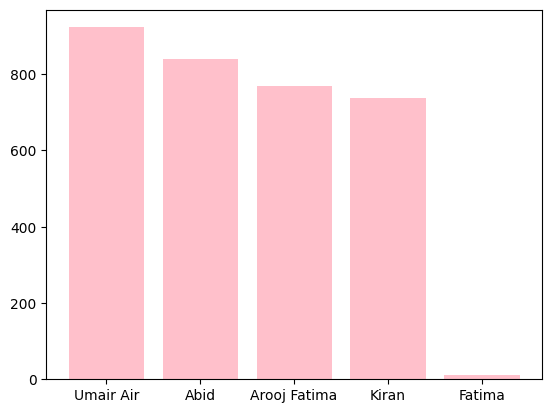

In [ ]:
name=x.index
count=x.values
plt.bar(name,count,color='pink')

In [ ]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']


In [ ]:
with open('/content/stop words 1.txt', 'r') as f:
    stop_words = set(f.read().split())

In [ ]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)



**MOST COMMON WORDS**

In [ ]:
word_counts = Counter(words).most_common(20)

pd.DataFrame(word_counts, columns=['Word', 'Frequency'])


,Word,Frequency
0,😂,64
1,kay,41
2,ge,36
3,question,33
4,kam,23
5,a,22
6,gay,21
7,kro,19
8,he,18
9,just,17


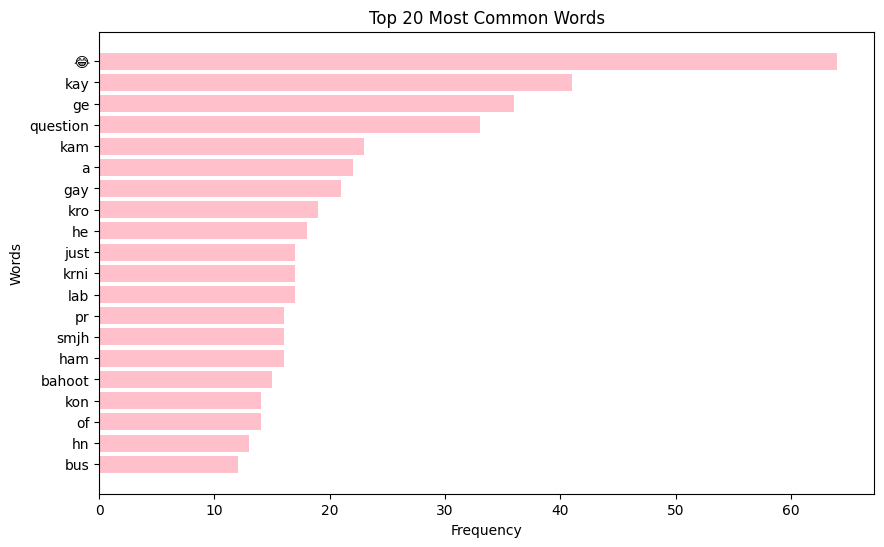

In [ ]:
word_df = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.barh(word_df['Word'], word_df['Frequency'], color='pink')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent words at the top
plt.show()

**MOST COMMON WORDS FOR INDIVIDUAL PERSON**

In [ ]:

specific_user = 'Arooj Fatima'

temp = df[(df['user'] == specific_user) & (df['user'] != 'group_notification')]
temp = temp[temp['message'] != '<Media omitted>\n']

with open('/content/stop words 1.txt', 'r') as f:
    stop_words = set(f.read().split())

words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

pd.DataFrame(Counter(words).most_common(20), columns=['Word', 'Frequency'])




,Word,Frequency
0,😂,64
1,kay,41
2,ge,36
3,question,33
4,kam,23
5,a,22
6,gay,21
7,kro,19
8,he,18
9,just,17


In [ ]:
from collections import Counter
from wordcloud import WordCloud

In [ ]:
with open('/content/stop words 1.txt', 'r') as f:
    stop_words = set(f.read().split())

# Initialize an empty list to store words after removing stop words
filtered_words = []

# Loop through each message and filter out the stop words
for message in df['message']:
    for word in message.lower().split():
        if word not in stop_words:
            filtered_words.append(word)

# Join the filtered words into a single string
filtered_text = ' '.join(filtered_words)

**WORD CLOUD**

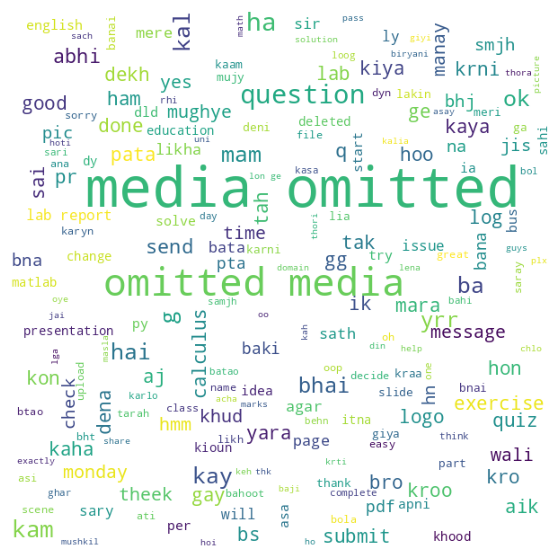

In [ ]:
# Generate the word cloud using the filtered text
wc = WordCloud(width=600, height=600, min_font_size=10, background_color='white')
df_wc = wc.generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(7, 7), facecolor=None)
plt.imshow(df_wc)
plt.axis("off")
plt.show()


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import emoji
from collections import Counter

In [ ]:
emojis = []

# Loop through each message in the DataFrame
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

# Count the frequency of each emoji
pd.DataFrame(Counter(emojis).most_common(), columns=['Emoji', 'Frequency'])


,Emoji,Frequency
0,😂,614
1,🏻,46
2,🤦,36
3,👍,33
4,🥹,28
...,...,...
81,💜,1
82,😡,1
83,😖,1
84,🫢,1


In [ ]:
specific_user = 'Arooj Fatima'

# Filter the DataFrame for the specific user
user_messages = df[df['user'] == specific_user]

# Initialize an empty list to store found emojis
emojis = []

# Loop through each message from the specific user and extract emojis
for message in user_messages['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

# Count the frequency of each emoji
pd.DataFrame(Counter(emojis).most_common(), columns=['Emoji', 'Frequency'])


,Emoji,Frequency
0,😂,145
1,🏻,13
2,🥹,13
3,🤝,11
4,🤧,10
5,🥺,10
6,😅,9
7,🥲,9
8,🤦,6
9,♀,6


In [ ]:
df['month_num']=df['date'].dt.month

In [ ]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [ ]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [ ]:
timeline['time']=time

In [ ]:
timeline

,year,month_num,month,message,time
0,2023,2,February,1311,February-2023
1,2023,3,March,513,March-2023
2,2023,4,April,201,April-2023
3,2023,5,May,741,May-2023
4,2023,9,September,89,September-2023
5,2023,10,October,343,October-2023
6,2023,11,November,16,November-2023
7,2023,12,December,47,December-2023
8,2024,1,January,22,January-2024


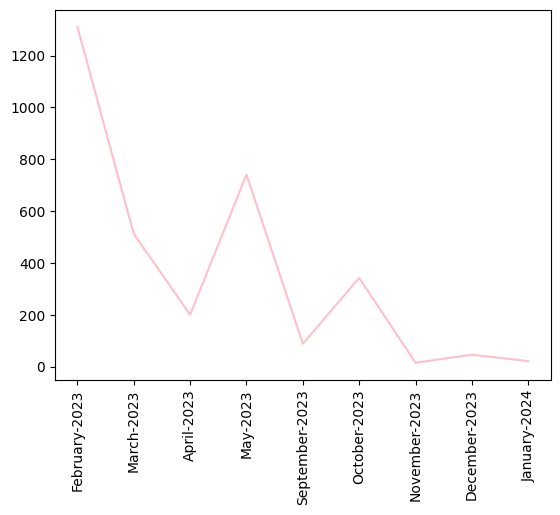

In [ ]:
plt.plot(timeline['time'],timeline['message'],color='pink')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date']=df['date'].dt.date

In [ ]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()


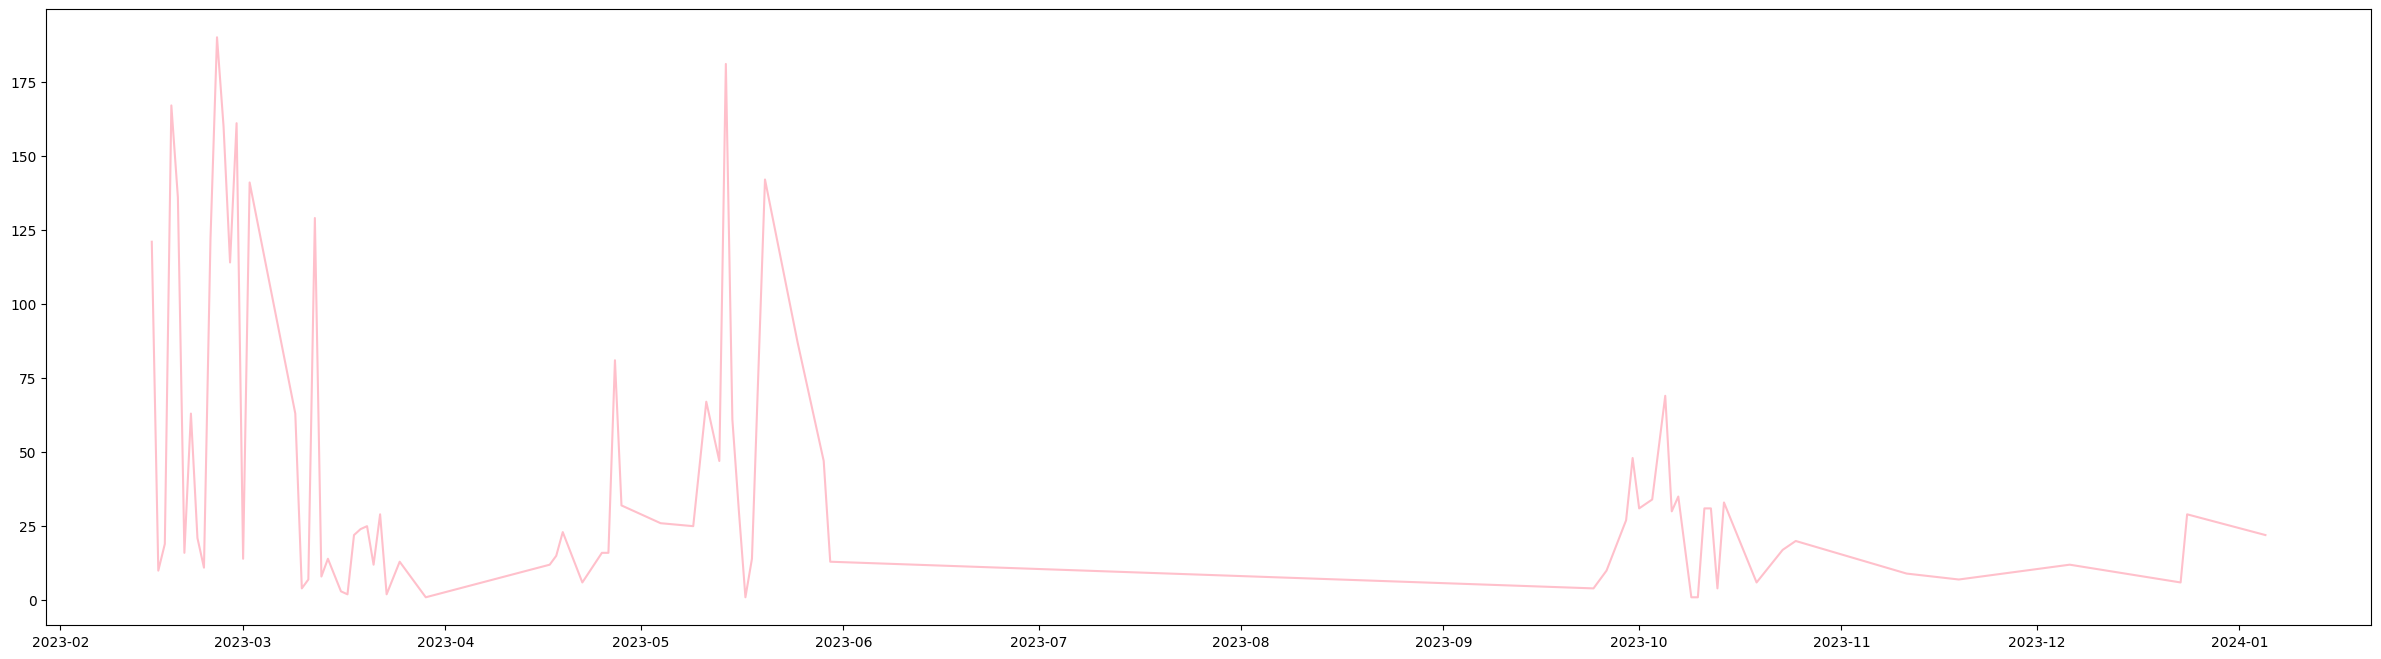

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(daily_timeline['only_date'],daily_timeline['message'],color='pink')


In [ ]:
df['day_name']=df['date'].dt.day_name()
df['day_name'].value_counts()

,count
day_name,
Saturday,725
Sunday,701
Thursday,611
Tuesday,394
Monday,301
Wednesday,289
Friday,262


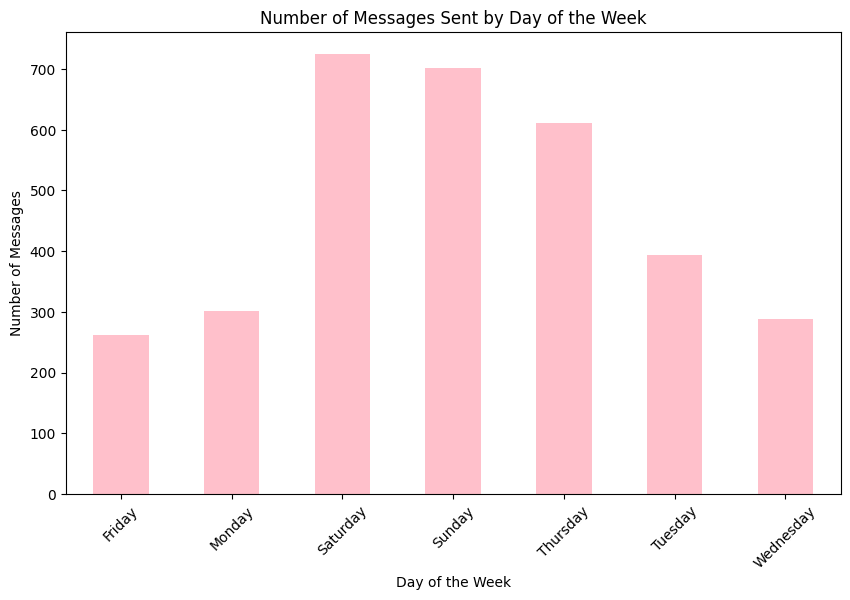

In [ ]:
day_counts = df['day_name'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
day_counts.sort_index().plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent by Day of the Week')

# Display the plot
plt.xticks(rotation=45)
plt.show()

<ipython-input-87-12aa14c70b75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['day_name'] = user_df['date'].dt.day_name()


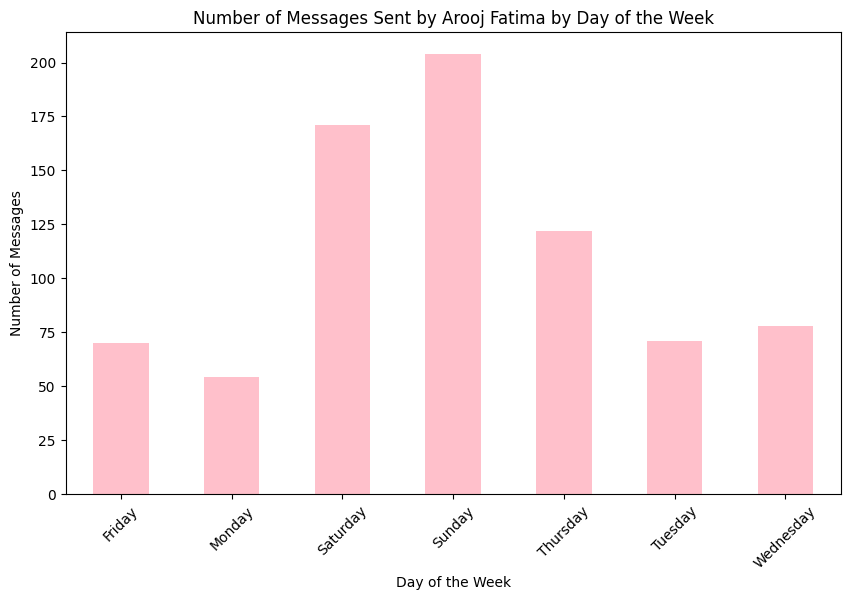

In [ ]:
specific_user = 'Arooj Fatima'

# Filter the DataFrame for the specific user
user_df = df[df['user'] == specific_user]

# Create a 'day_name' column if not already created
user_df['day_name'] = user_df['date'].dt.day_name()

# Count the number of messages sent by day of the week
day_counts = user_df['day_name'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
day_counts.sort_index().plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title(f'Number of Messages Sent by {specific_user} by Day of the Week')

# Display the plot
plt.xticks(rotation=45)
plt.show()

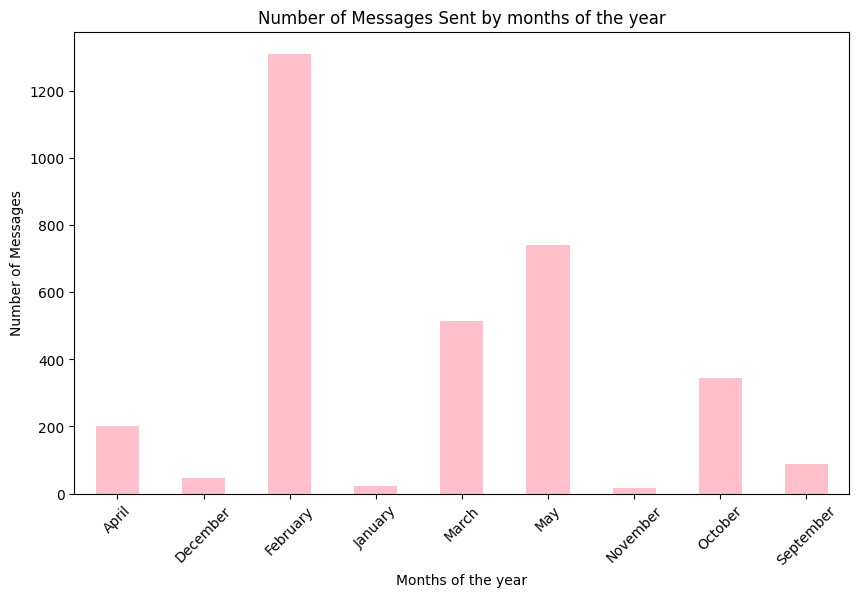

In [ ]:
day_counts = df['month'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
day_counts.sort_index().plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Months of the year')
plt.ylabel('Number of Messages')
plt.title('Number of Messages Sent by months of the year')

# Display the plot
plt.xticks(rotation=45)
plt.show()

<ipython-input-91-2c7cf67c8d17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['day_name'] = user_df['date'].dt.day_name()


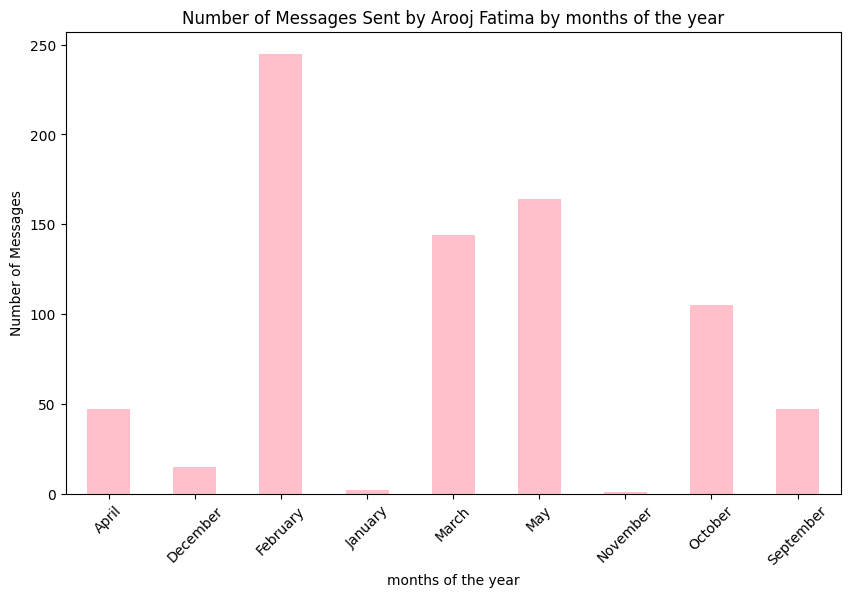

In [ ]:
specific_user = 'Arooj Fatima'

# Filter the DataFrame for the specific user
user_df = df[df['user'] == specific_user]

# Create a 'day_name' column if not already created
user_df['day_name'] = user_df['date'].dt.day_name()

# Count the number of messages sent by day of the week
day_counts = user_df['month'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
day_counts.sort_index().plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('months of the year')
plt.ylabel('Number of Messages')
plt.title(f'Number of Messages Sent by {specific_user} by months of the year')

# Display the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
       period.append(str(hour)+"-"+str('00'))
    elif hour==0:
         period.append(str('00')+"-"+str(hour+1))
    else:
        period.append(str(hour)+"-"+str(hour+1))

In [ ]:
df['period']=period
df.sample(5)

,date,user,message,only_date,year,month_num,month,day,day_name,hour,minute,period
114,2023-02-15 22:24:00,Umair Air,Yes bro\n,2023-02-15,2023,2,February,15,Wednesday,22,24,22-23
1806,2023-03-22 17:52:00,Arooj Fatima,Mashallah\n,2023-03-22,2023,3,March,22,Wednesday,17,52,17-18
2319,2023-05-14 23:19:00,Umair Air,Tu cp ki animation wali assignment kr ly gy\n,2023-05-14,2023,5,May,14,Sunday,23,19,23-00
2184,2023-05-13 20:29:00,Kiran,Wazey ap mazaq bhi apni tarah Kahsa fazool kar...,2023-05-13,2023,5,May,13,Saturday,20,29,20-21
1746,2023-03-19 00:15:00,Kiran,Agreed👍😂\n,2023-03-19,2023,3,March,19,Sunday,0,15,00-1


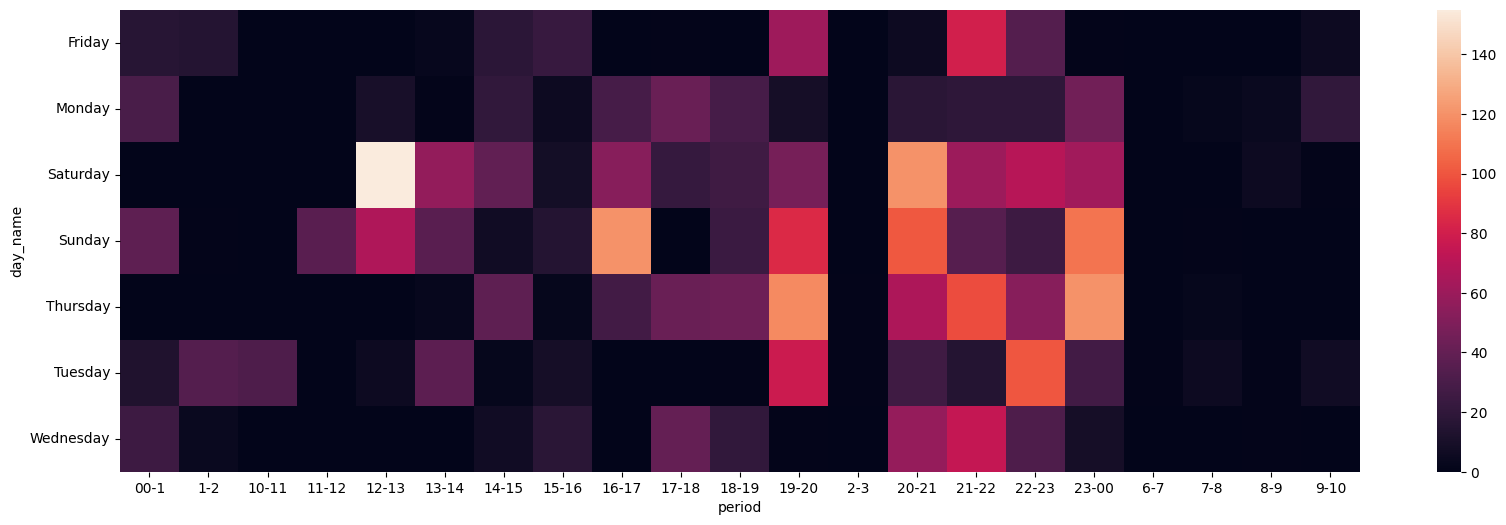

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()